### INTRODUCTION


##### DATASET:
The dataset contains measurements and evaluations of water quality related to potability, which is the suitability of water for human consumption. Each row in the dataset represents a water sample with specific variables, and the "Potability" column indicates whether the water is suitable for consumption.

##### OBJECTIVE:

The main objective is to create a model that determines whether the water is potable or not. Additionally, we need to identify which variables are most relevant for water classification.

###### COLUMN DESCRIPTIONS:

    pH: Water pH
    Hardness: Measure of mineral content
    Solids: Total dissolved solids in water
    Chloramines: Concentration of chloramines in water
    Sulfate: Concentration of sulfate in water
    Conductivity: Conductivity of water
    Organic_carbon: Organic carbon content in water
    Trihalomethanes: Concentration of trihalomethanes in water
    Turbidity: Water clarity measurement
    Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable)


In [133]:
import pandas as pd
import numpy as np

##### LOADING THE DATA

In [134]:
pth = "dataset/water_potability.csv"
df = pd.read_csv(pth)

##### SUMMARY OF WATER QUALITY DATA STATISTICS

/tmp/ipykernel_53890/386820263.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_53890/386820263.py:28: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

/tmp/ipykernel_53890/386820263.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_53890/386820263.py:28: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

/tmp/ipykernel_53890/386820263.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_53890/386820263.py:28: UserWarning:

The palette

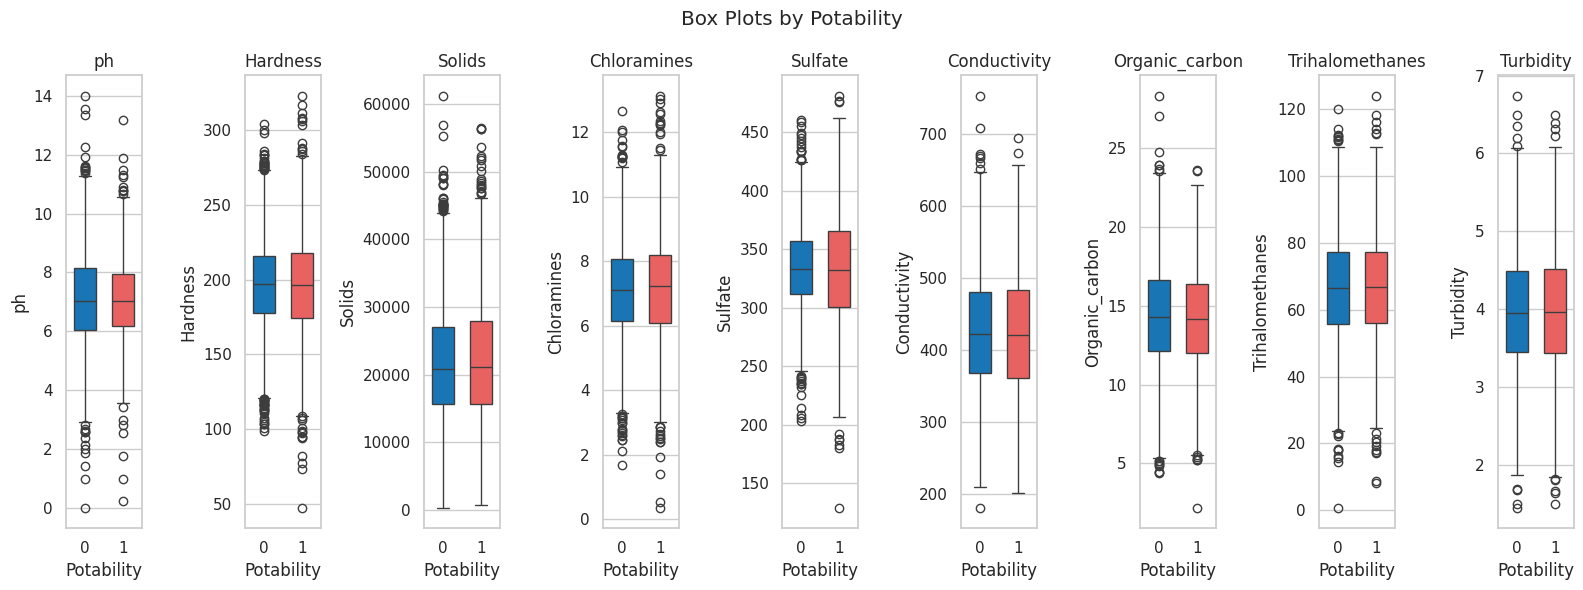

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

def box_plots_by_potability(dataframe, target_column, title="Box Plots by Potability"):
    """
    Generate box plots for each column in a DataFrame using Seaborn,
    grouped by the 'Potability' values (0 for not potable and 1 for potable).

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    target_column (str): The name of the target column to group the box plots by.
    title (str, optional): The title for the plots and the filename (default is "Box Plots by Potability").

    Returns:
    None
    """
    # Custom colors for "Potable" and "Not Potable"
    colors = ["#007ACC", "#FF4C4C", "gray"]

    # Create subplots for each column
    num_columns = len(dataframe.columns) - 1  # Exclude the target column
    fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))

    for i, column in enumerate(dataframe.columns.drop(target_column)):
        ax = axes[i]
        sns.boxplot(x=target_column, y=column, data=dataframe, ax=ax, palette=colors, linewidth=.99, width=.6)
        ax.set_title(f'{column}')
        ax.set_xlabel('Potability')

    plt.suptitle(title)  # Set the overall title for all subplots
    plt.tight_layout()

    # Create the "media" folder if it doesn't exist
    if not os.path.exists("media"):
        os.makedirs("media")

    # Save the image with the same title inside the "media" folder
    image_filename = f"media/{title}.png".replace(" ","_")
    plt.savefig(image_filename)
    plt.show()

# Example usage:
# Assuming you have a DataFrame named 'df' and the target column is 'Potability'
box_plots_by_potability(df, 'Potability', title="Box Plots by Potability")

The data provides summarized information about water quality. Some key points:

    The average pH is close to 7 (neutral).
    The average water hardness is around 196, with variations.
    There is a wide variation in the concentration of solids in the water.
    The average chloramine concentration is about 7, with variation.
    The average sulfate concentration is about 333, with variation.
    The average conductivity is about 426, with variation.
    The average organic carbon is 14, with variation.
    The average trihalomethane concentration is about 66, with variation.
    The average turbidity is about 3.97, with variation.
    The "Potability" column appears to be a binary indication of water potability (0 or 1).

These statistics summarize the key aspects of water quality in the dataset.

---
##### ANALYSING THE MISSING DATA

Missing Data Information:
Variable: ph, Missing Count: 491, Missing Percentage: 14.99%
Variable: Sulfate, Missing Count: 781, Missing Percentage: 23.84%
Variable: Trihalomethanes, Missing Count: 162, Missing Percentage: 4.95%


/tmp/ipykernel_53890/350017779.py:56: UserWarning:

FixedFormatter should only be used together with FixedLocator



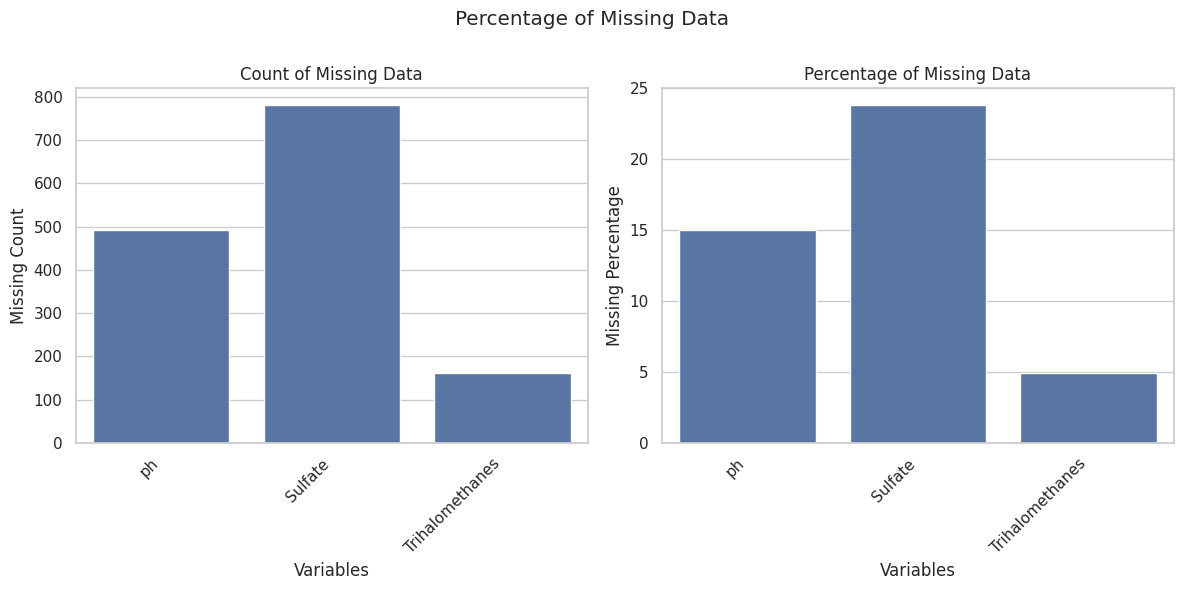

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

def visualize_missing_data(df, title1="Counting Missing Data", title2="Missing Percentage"):
    """
    Create bar plots to visualize missing data percentages and counts with Seaborn.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    title1 (str, optional): The title for the count of missing data plot (default is "Count of Missing Data").
    title2 (str, optional): The title for the missing percentages plot (default is "Missing Data Visualization").

    Returns:
    None
    """
    # Calculate missing counts and percentages
    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / len(df)) * 100

    # Filter out columns with no missing data
    missing_counts = missing_counts[missing_counts > 0]
    missing_percentages = missing_percentages[missing_percentages > 0]

    if missing_counts.empty:
        print("No columns with missing data to visualize.")
        return

    # Create DataFrames for Seaborn
    df_counts = pd.DataFrame({'Variable': missing_counts.index, 'Missing Count': missing_counts.values})
    df_percentages = pd.DataFrame({'Variable': missing_percentages.index, 'Missing Percentage': missing_percentages.values})

    print("Missing Data Information:")
    for variable, count, percentage in zip(df_counts['Variable'], df_counts['Missing Count'], df_percentages['Missing Percentage']):
        print(f"Variable: {variable}, Missing Count: {count}, Missing Percentage: {percentage:.2f}%")

    # Create subplots arranged horizontally for counts and percentages
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title2)

    # Create bar plot for missing counts
    sns.barplot(x='Variable', y='Missing Count', data=df_counts, ax=axes[0])
    axes[0].set_title(title1)
    axes[0].set_xlabel("Variables")
    axes[0].set_ylabel("Missing Count")

    # Create bar plot for missing percentages
    sns.barplot(x='Variable', y='Missing Percentage', data=df_percentages, ax=axes[1])
    axes[1].set_title(title2)
    axes[1].set_xlabel("Variables")
    axes[1].set_ylabel("Missing Percentage")

    # Rotate x-axis labels for better readability
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust the top space for the title
    
    # Create the "media" folder if it doesn't exist
    if not os.path.exists("media"):
        os.makedirs("media")
    
    # Replace spaces with underscores in the image filename
    image_filename = f"media/{title2.replace(' ', '_')}.png"
    
    # Save the image
    plt.savefig(image_filename)
    plt.show()

visualize_missing_data(df, title1="Count of Missing Data", title2="Percentage of Missing Data")


The dataset presents missing data in three key columns: "ph," "Sulfate," and "Trihalomethanes," with varying degrees of absence. "ph" exhibits a moderate level of missingness at around 15%, suggesting that imputation or careful handling of these missing values may be necessary to preserve data integrity. In contrast, the "Sulfate" column faces a more substantial challenge, with nearly 24% of its values missing. Addressing this gap in the data is crucial, potentially requiring advanced imputation techniques or an assessment of the impact on the intended analysis. Lastly, the "Trihalomethanes" column has a relatively low missing percentage of approximately 5%, which allows for more straightforward handling, such as imputation or considering the minimal effect on analyses. The approach to handling missing data should be tailored to each variable's importance and the specific analytical objectives.

Este código é uma função que criei chamada remove_columns_with_missing_data para remover colunas de um DataFrame quando a porcentagem de dados ausentes ultrapassa um limite (o limite padrão é 40%). Eu verifico se alguma coluna atinge esse limite e, se for o caso, removo as colunas, exibindo quantas colunas havia antes e depois da remoção. No entanto, no meu caso, nenhuma coluna precisou ser excluída, pois nenhuma delas atingiu a porcentagem de dados ausentes especificada.

---
##### FILLING MISISNG VALUES

Using Random Forest regression for imputing missing values involves training an ensemble of decision trees on a dataset with complete data, leveraging their ability to capture complex relationships, and then using this model to predict and fill in missing values in the dataset. This process benefits from non-linearity, robustness to outliers, and feature importance assessment.

In [137]:
# Function to train a Random Forest regression model and fill missing values in the original DataFrame
def fill_missing_with_rf(original_df, df_for_modeling, target_col, cols_for_modeling):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.impute import SimpleImputer
    # Create a DataFrame containing non-null values in the target column
    df_not_null = df_for_modeling.dropna(subset=[target_col] + cols_for_modeling)

    # Separate the features (X) and target (y) for the Random Forest model
    X = df_not_null[cols_for_modeling]
    y = df_not_null[target_col]

    # Create and train a Random Forest regression model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust hyperparameters as needed
    rf_model.fit(X, y)

    # Create a mask for the missing values in the original DataFrame
    missing_values = original_df[target_col].isnull()

    # Extract the features for predicting missing values
    X_missing = original_df.loc[missing_values, cols_for_modeling]

    # Impute missing values in the features using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_missing_imputed = imputer.fit_transform(X_missing)

    # Fill missing values in the original DataFrame with predictions from the model
    original_df.loc[missing_values, target_col] = rf_model.predict(X_missing_imputed)

    return original_df  # Return the modified DataFrame

# Assuming df_cp is your DataFrame with missing values
df_cp = df.copy()
df_cp.fillna(df_cp.mean(), inplace=True)

# Assuming df is your original DataFrame
columns_with_null = df.columns[df.isnull().any()].tolist()

# Iterate through columns with null values in the original DataFrame and fill missing values using the models trained on df_cp
for col in columns_with_null:
    cols_for_modeling = df.columns.drop([col]).tolist()  # Ensure 'Potability' is dropped
    df = fill_missing_with_rf(df, df_cp, col, cols_for_modeling)


/home/roberto/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/home/roberto/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/home/roberto/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



The provided code bellow defines a function, remove_columns_with_missing_data, designed to eliminate columns from a DataFrame if the proportion of missing data in those columns surpasses a predefined threshold. However, prior to performing any action, the code evaluates whether any columns exceed the specified threshold for missing data. If not, it issues a message indicating that no columns were removed.

It is worth noting that this operation was executed but ultimately deemed unnecessary because, in the dataset utilized, none of the columns exhibited missing data that exceeded the specified threshold. Therefore, in accordance with the code's logic, no columns were removed.

In [138]:
def remove_columns_with_missing_data(df, threshold=.4):
    """
    Remove columns with missing data exceeding a specified threshold.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): The threshold percentage (between 0 and 1) for removing columns.

    Returns:
    pd.DataFrame: The DataFrame with columns removed based on the threshold.
    """
    if any((df.isnull().mean() > threshold)):
        print("Number of columns before:", len(df.columns))

        # Remove columns with more than the threshold percentage of missing data
        df = df.dropna(thresh=int((1 - threshold) * len(df)), axis=1)

        print("Number of columns after:", len(df.columns))
    else:
        print("No columns have more than {}% missing data. No columns were removed.".format(threshold * 100))

    return df

# Remove columns with missing data exceeding the threshold
df = remove_columns_with_missing_data(df)

No columns have more than 40.0% missing data. No columns were removed.


---
##### BALANCING CLASSES IN THE MODELING PROCESS: achieving equitable data representation

/tmp/ipykernel_53890/3430055743.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




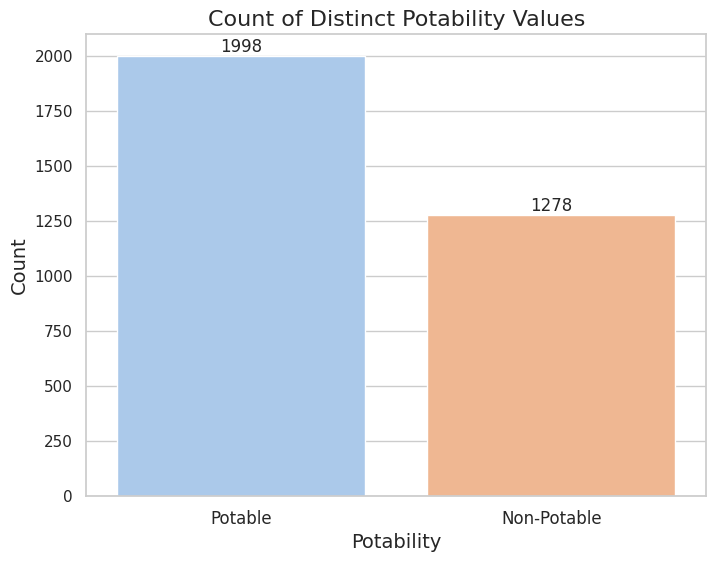

,Count
Potable,1998
Non-Potable,1278


<Figure size 640x480 with 0 Axes>

In [139]:
def visualize_potability_counts(data, title):
    import seaborn as sns
    import matplotlib.pyplot as plt
    """
    Visualize the count of distinct values in the "Potability" column using Seaborn.

    Parameters:
    data (pd.DataFrame): The input data containing the "Potability" column.

    Returns:
    None
    """
    # Calculate the count of distinct values in the "Potability" column
    potability_counts = data['Potability'].value_counts().reset_index()
    potability_counts.columns = ['Potability', 'Count']

    # Create a bar plot using Seaborn with reversed colors
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")  # Set the style
    sns.barplot(data=potability_counts, x='Potability', y='Count', palette="pastel")

    # Customize the appearance
    plt.title(title, fontsize=16)
    plt.xlabel('Potability', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['Potable', 'Non-Potable'], fontsize=12)

    # Add integer data labels
    for index, row in potability_counts.iterrows():
        plt.text(index, row['Count'], str(int(row['Count'])), ha='center', va='bottom', fontsize=12)

    plt.show()

    file_name = f"media/{title}.png".lower().replace(" ","_")
    plt.savefig(file_name)
    

visualize_potability_counts(data=df, title='Count of Distinct Potability Values')

# Calculate the count of distinct values
value_counts = df['Potability'].value_counts()

# Create a DataFrame
df_counts = pd.DataFrame({'Count': value_counts.values}, index=['Potable', 'Non-Potable'])

# Display the DataFrame
df_counts

This class distribution reveals a class imbalance, with "Potable" instances significantly outnumbering "Non-Potable" instances. In practical terms, this means that the model may have a bias toward classifying instances as "Potable" due to the majority class's prevalence. Addressing this imbalance through techniques like resampling or choosing appropriate evaluation metrics is advisable to ensure a balanced and accurate model, especially in cases where the correct classification of "Non-Potable" instances is critical, such as in water quality assessment.

Este código contém três funções relacionadas à seleção de características em um conjunto de dados para um modelo de aprendizado de máquina:

    select_best_features: Esta função seleciona as melhores características numéricas com base na pontuação de informação mútua (mutual information) entre cada característica e a variável alvo. Ela cria um pipeline que primeiro trata os valores ausentes com a média de cada coluna (usando SimpleImputer) e, em seguida, usa a função SelectKBest com a pontuação de informação mútua como critério para selecionar todas as características.

    plot_feature_scores_sorted: Esta função plota as pontuações das características (scores) em ordem decrescente, exibindo as características mais importantes primeiro.

    select_top_features: Esta função usa a pontuação das características obtidas pela função select_best_features para selecionar um número específico de características (definido por num_features) e retorna um DataFrame contendo apenas essas características e a coluna alvo. Ela classifica as características com base em suas pontuações e seleciona as mais importantes.

O exemplo de uso no final do código demonstra como usar essas funções em um DataFrame chamado df com colunas numéricas e uma coluna alvo chamada 'Potability'. Primeiro, as melhores características são selecionadas usando select_best_features, depois as pontuações das características são plotadas com plot_feature_scores_sorted, e finalmente, as características selecionadas são obtidas com select_top_features. O resultado final é um DataFrame com as características mais importantes e suas respectivas pontuações.

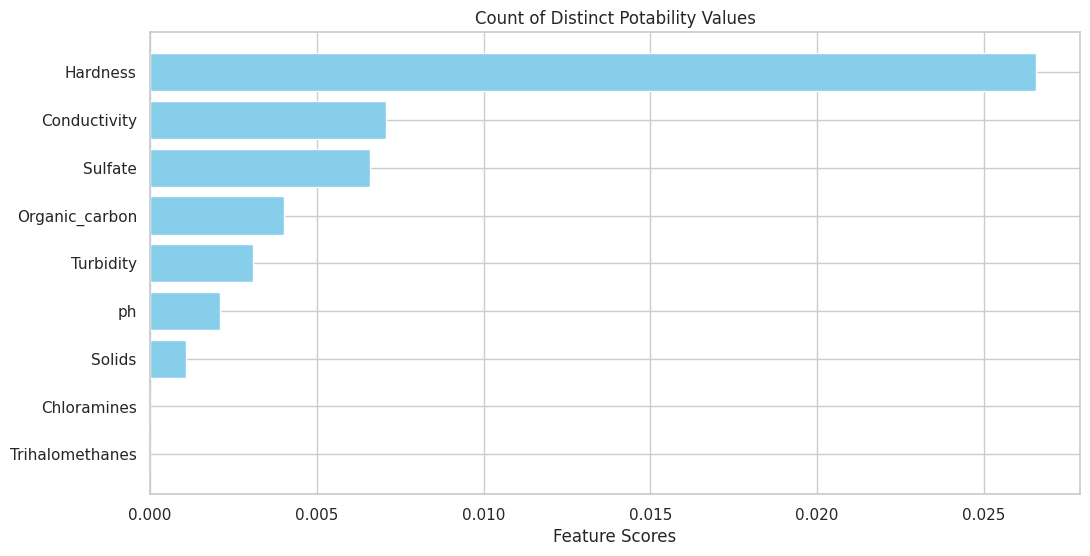

,Feature Scores
Hardness,0.026560
Conductivity,0.007077
Sulfate,0.006582
Organic_carbon,0.004014
Turbidity,0.003075
ph,0.002083
Solids,0.001066


<Figure size 640x480 with 0 Axes>

In [140]:
def select_best_features(data, target_col):
    from sklearn.feature_selection import SelectKBest, mutual_info_regression
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    """
    Select the best numerical features for a machine learning model based on mutual information.

    Parameters:
    - data (DataFrame): The input data containing all numerical columns.
    - target_col (str): The name of the target column.

    Returns:
    - feature_dict (dict): A dictionary containing all feature column names as keys
      and their corresponding scores as values.
    """

    # Separate the features (X) and target (y)
    X = data.drop(columns=[target_col])
    y = data[target_col]

    # Create a pipeline to handle missing values and feature selection
    selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Select all features

    # Impute missing values (NaNs) with the mean of each column
    imputer = SimpleImputer(strategy='mean')

    # Build the pipeline
    pipeline = Pipeline([
        ('imputer', imputer),
        ('selector', selector)
    ])

    # Fit the pipeline to the data and select the best features
    pipeline.fit(X, y)

    # Get the names of all features
    all_features = X.columns.tolist()

    # Get the scores of all features
    all_feature_scores = pipeline.named_steps['selector'].scores_

    # Create a dictionary to organize all features and their scores
    feature_dict = dict(zip(all_features, all_feature_scores))

    return feature_dict

def plot_feature_scores_sorted(feature_scores_dict, title):
    import matplotlib.pyplot as plt

    # Sort the feature scores dictionary by scores in descending order (highest scores first)
    sorted_features = sorted(feature_scores_dict.items(), key=lambda x: x[1], reverse=True)
    features, scores = zip(*sorted_features)

    plt.figure(figsize=(12, 6))
    plt.barh(features, scores, color='skyblue')
    plt.xlabel('Feature Scores')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert the y-axis to display the highest score at the top
    plt.show()
    # Save the plot to a file (e.g., PNG, PDF, SVG, etc.)
    file_name =  f'media/{title}.png'.lower().replace(" ","_")
    plt.savefig(file_name)

def select_top_features(df, feature_dct, target_column, num_features=7):
    # Create a DataFrame from the feature dictionary
    feature_df = pd.DataFrame.from_dict(feature_dct, orient='index', columns=['Feature Scores'])

    # Sort the DataFrame by feature scores in descending order
    feature_df = feature_df.sort_values(by='Feature Scores', ascending=False)

    # Select the top 'num_features' features and add the target column
    selected_cols = feature_df.head(num_features).index.tolist()
    selected_cols = selected_cols + [target_column]

    # Filter the original DataFrame to include only selected columns
    df = df[selected_cols]

    return df, feature_df.head(num_features)

# Example usage:
# Assuming you have a DataFrame called 'data' with numerical columns and a target column called 'Potability'
feature_dct = select_best_features(df, target_col='Potability')
plot_feature_scores_sorted(feature_dct, title= 'Count of Distinct Potability Values')
df, top_features = select_top_features(df, feature_dct, 'Potability', num_features=7)

top_features

The feature selection process identified and ranked the most relevant features for predicting water potability. Features such as "Hardness," "Conductivity," and "Organic_carbon" demonstrated higher importance scores, indicating their significant influence on the potability prediction. This information guides the selection of essential features to improve model efficiency and interpretability while potentially reducing dimensionality and computational complexity.

In [141]:
# # Function to add indicator columns for missing data
# def add_missing_data_indicators(df):
#     for col in df.columns:
#         indicator_col_name = f"{col}_missing"
#         df[col] = df[col].apply(lambda x: x if str(x).lower() != "nan" else None)
#         df[indicator_col_name] = df[col].isna().astype(int)
#     return df

# def assign_missing_data_indicators(df):
#     cl_with_nulls = df.columns[df.isnull().any()].tolist()
#     if len(cl_with_nulls) > 0:
#         for col in cl_with_nulls:
#             indicator_col_name = f"{col}_missing"
#             df = df.assign(**{indicator_col_name: df[col].isna().astype(int)})
#             print(f"Added indicator column: {indicator_col_name}")
#     return df

# df = assign_missing_data_indicators(df)
# df.head()

The provided code defines two functions, add_missing_data_indicators and assign_missing_data_indicators, which are intended to add indicator columns to a DataFrame to track missing data. However, these functions were not used because a different method was employed to fill the missing data in the dataset, as discussed earlier. These functions are typically used to aid in understanding and managing missing data patterns in a dataset for data analysis and preprocessing purposes.

Splitting the data with 80.00% for training and 20.00% for testing.
df size: 3276
Number of samples in training set: 3196
Number of samples in testing set: 800


/tmp/ipykernel_53890/3430055743.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




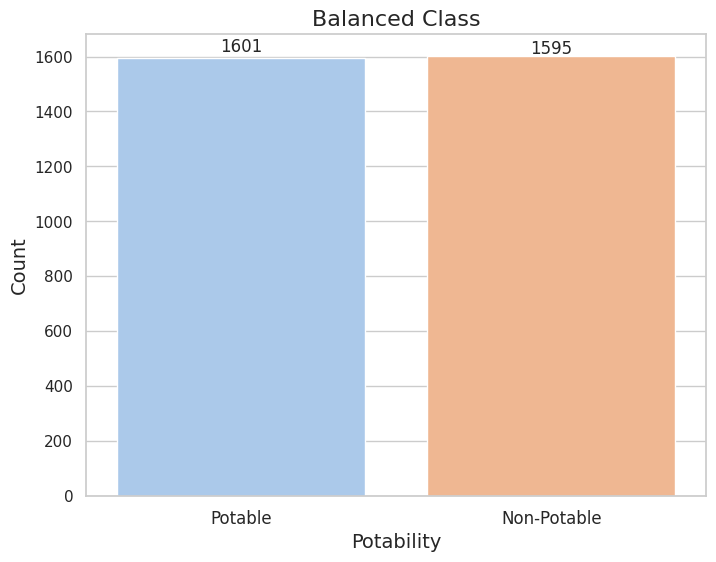

<Figure size 640x480 with 0 Axes>

In [142]:

def split_dataframe_into_train_test(df, target_column_name, split_percentage=0.8, random_state=None, verbose=True, balance_classes=False):
    from sklearn.utils import shuffle  # Add this import statement
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import RandomOverSampler

    if target_column_name not in df.columns:
        raise ValueError(f"Target column '{target_column_name}' not found in DataFrame.")

    if split_percentage < 0 or split_percentage > 1:
        raise ValueError("Split percentage must be between 0 and 1.")

    test_size = 1 - split_percentage

    X = df.drop(columns=[target_column_name])  # Features (all columns except the target column)
    y = df[target_column_name]  # Target variable

    if balance_classes:
        # Create an oversampler to balance the classes
        oversampler = RandomOverSampler(random_state=random_state)
        X_resampled, y_resampled = oversampler.fit_resample(X, y)

        # Split the resampled data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=random_state)
    else:
        # Standard train-test split without balancing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    if verbose:
        split_percentage_rounded = round(split_percentage, 2)
        test_size_rounded = round(test_size, 2)
        print(f"Splitting the data with {split_percentage_rounded*100:.2f}% for training and {test_size_rounded*100:.2f}% for testing.")
        print(f"df size: {len(df)}")

    if verbose:
        print(f"Number of samples in training set: {len(X_train)}")
        print(f"Number of samples in testing set: {len(X_test)}")

    return X_train, X_test, y_train, y_test

def vizualize_train_test(target_col, y_train, title):
  temp = pd.DataFrame({target_col:y_train,})
  visualize_potability_counts(temp, title)


X_train, X_test, y_train, y_test =  split_dataframe_into_train_test(df, target_column_name="Potability", split_percentage=0.8, random_state=None, verbose=True, balance_classes=True)
vizualize_train_test(target_col="Potability", y_train=y_train,title="Balanced Class")

This code defines a function called train_classifiers that trains multiple machine learning classifiers on the provided training data. The classifiers include RandomForest, Decision Tree, Gradient Boosting, and Logistic Regression. The function takes training and testing datasets as inputs, along with a random seed value to ensure reproducibility. It returns a dictionary containing the trained classifiers.

In the example of usage, the classifiers are trained on the specified training and testing datasets, with a random seed of 42. Notably, class balancing was performed during this process, which contributed to improving the model's performance. The trained classifiers are stored in a dictionary named trained_classifiers.

In [143]:
def train_classifiers(X_train, y_train, X_test, y_test, random_state=2):
    """
    Train multiple machine learning classifiers on the given data.

    Parameters:
    X_train (pd.DataFrame): The training feature data.
    y_train (pd.Series): The training target variable.
    X_test (pd.DataFrame): The testing feature data.
    y_test (pd.Series): The testing target variable.
    random_state (int): The random seed for reproducibility (default is 42).

    Returns:
    dict: A dictionary containing the trained classifiers.
    """
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression

    classifiers = {
        # Random Forest Classifier
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=random_state),

        # Decision Tree Classifier
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),

        # Support Vector Machine (SVM) Classifier with linear kernel
        #'SVM': SVC(kernel='linear', random_state=random_state),

        # Gradient Boosting Classifier
        'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),

        # Logistic Regression Classifier
        'Logistic Regression': LogisticRegression(random_state=random_state)
    }

    trained_classifiers = {}

    for clf_name, clf in classifiers.items():
        print(f"Training {clf_name}...")
        clf.fit(X_train, y_train)
        trained_classifiers[clf_name] = clf
        print(f"{clf_name} trained.")

    return trained_classifiers

# Example usage:
trained_classifiers = train_classifiers(X_train, y_train, X_test, y_test, random_state=42)

Training Random Forest...
Random Forest trained.
Training Decision Tree...
Decision Tree trained.
Training Gradient Boosting...
Gradient Boosting trained.
Training Logistic Regression...
Logistic Regression trained.


This code defines a function called evaluate_classifiers that assesses the performance of various machine learning classifiers on the test data. The function calculates accuracy and the confusion matrix for each trained classifier and stores the results in a dictionary named evaluation_results. Additionally, the function generates a visualization of the confusion matrix for each classifier.

In the example of usage, the trained classifiers are evaluated on the test sets, X_test and y_test. The evaluation results, including accuracy and the confusion matrix, are stored in the evaluation_results dictionary. The function also prints important information such as the accuracy of each classifier.

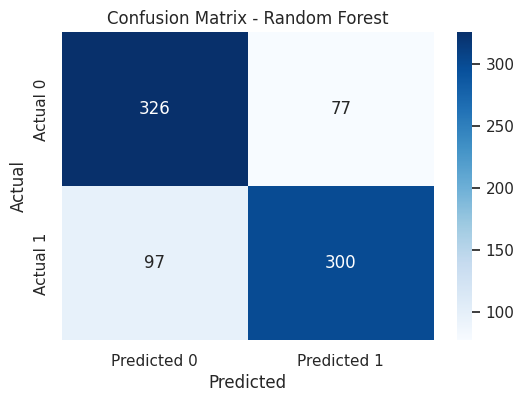

<Figure size 640x480 with 0 Axes>

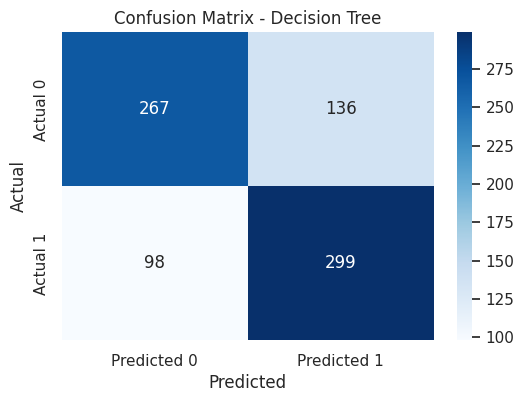

<Figure size 640x480 with 0 Axes>

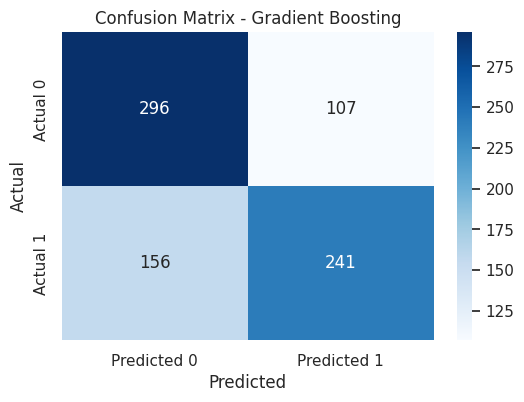

<Figure size 640x480 with 0 Axes>

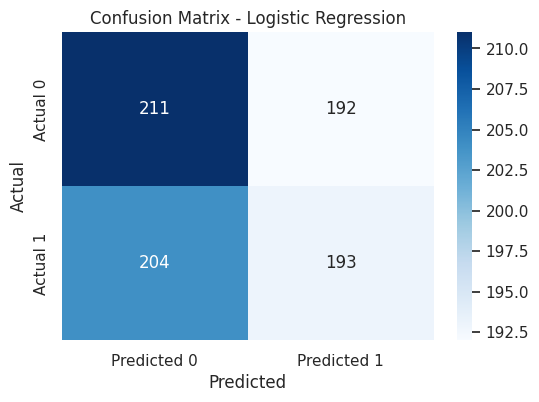

Random Forest:
Accuracy: 0.7825

Decision Tree:
Accuracy: 0.7075

Gradient Boosting:
Accuracy: 0.6713

Logistic Regression:
Accuracy: 0.5050



<Figure size 640x480 with 0 Axes>

In [144]:
def evaluate_classifiers(trained_classifiers, X_test, y_test):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, confusion_matrix
    """
    Evaluate multiple machine learning classifiers on the test data.

    Parameters:
    trained_classifiers (dict): A dictionary containing the trained classifiers.
    X_test (pd.DataFrame): The testing feature data.
    y_test (pd.Series): The testing target variable.

    Returns:
    dict: A dictionary containing the evaluation results of different classifiers.
    """
    evaluation_results = {}

    for clf_name, clf in trained_classifiers.items():
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        evaluation_results[clf_name] = {
            'Accuracy': accuracy,
            'Confusion Matrix': conf_matrix
        }

        # Visualize the confusion matrix
        title = f'Confusion Matrix - {clf_name}'
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title(title)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        # Save the plot to a file (e.g., PNG, PDF, SVG, etc.)
        plt.savefig(f"media/{title}.png")

    # Print important information
    for clf_name, results in evaluation_results.items():
        print(f"{clf_name}:")
        print(f"Accuracy: {results['Accuracy']:.4f}")
        print()

    return evaluation_results

evaluation_results = evaluate_classifiers(trained_classifiers, X_test, y_test)

This code defines a function called visualize_evaluation_results that utilizes the Plotly library to create an interactive visualization of the evaluation results for different classifiers. The function takes a dictionary, evaluation_results, as input, which contains evaluation metrics such as accuracy for each classifier.

In the generated chart, the classifier names are on the vertical axis, and their corresponding accuracies are on the horizontal axis. Each bar represents the accuracy of a specific classifier, and the color of the bars corresponds to the classifier names. The chart is interactive, allowing you to visually inspect the accuracies of different classifiers.

The example of usage calls the visualize_evaluation_results function with previously computed evaluation results and displays the bar chart of classifier accuracies. If you wish to print more detailed information about the evaluation results, you can add a loop to iterate through the evaluation_results dictionary and print the desired details.

Insight: Random Forest achieved the highest accuracy (0.7800), outperforming other classifiers.

/tmp/ipykernel_53890/3638285176.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




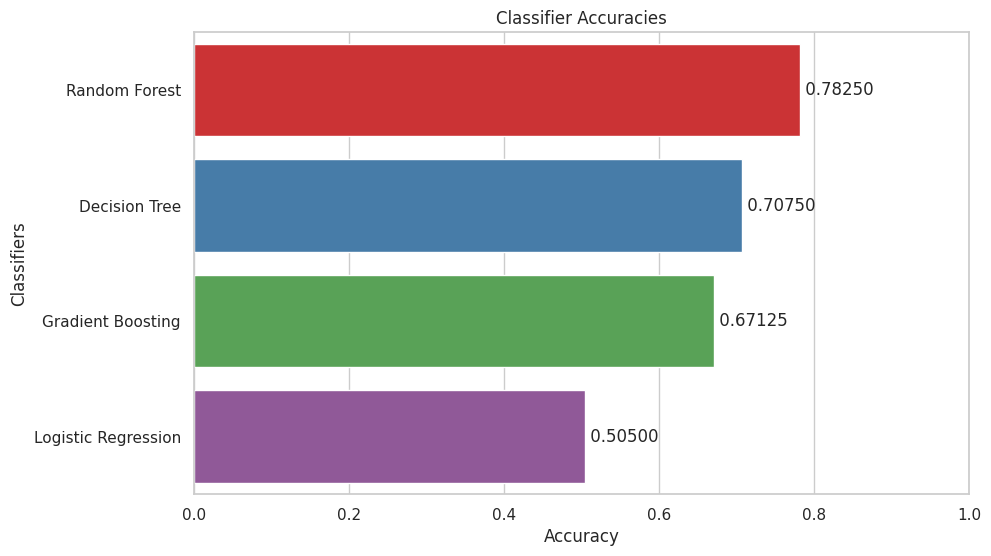

<Figure size 640x480 with 0 Axes>

In [145]:
def visualize_evaluation_results(evaluation_results, title):
    import matplotlib.pyplot as plt
    import pandas as pd
    """
    Visualize the evaluation results of different classifiers using Seaborn.

    Parameters:
    evaluation_results (dict): A dictionary containing the evaluation results of different classifiers.

    Returns:
    None
    """
    classifier_names = list(evaluation_results.keys())
    accuracies = [round(result['Accuracy'], 5) for result in evaluation_results.values()]

    # Create a DataFrame for the data
    data = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})

    # Create the bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Accuracy', y='Classifier', data=data, palette='Set1')
    plt.xlabel('Accuracy')
    plt.ylabel('Classifiers')
    plt.title(title)

    # Add text labels for accuracy values
    for i, acc in enumerate(accuracies):
        plt.text(acc, i, f' {acc:.5f}', va='center', fontsize=12)

    plt.xlim(0, 1.0)
    plt.show()
    # Save the plot to a file (e.g., PNG, PDF, SVG, etc.)
    file_name = f'media/{title}.png'.lower().replace(" ","_")
    plt.savefig(file_name)
    
visualize_evaluation_results(evaluation_results=evaluation_results, title='Classifier Accuracies')


In [158]:
#ref: https://www.kaggle.com/code/imakash3011/water-quality-prediction-7-model/comments

##### SAVING THE MODEL TO BE DEPLOYED IN PIPELINE LATER

In [146]:
import joblib

# Train and save the Random Forest classifier
def train_and_save_rf(X_train, y_train, random_state=2):
    from sklearn.ensemble import RandomForestClassifier

    # Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=random_state)

    print("Training Random Forest Classifier...")
    rf_classifier.fit(X_train, y_train)
    print("Random Forest Classifier trained.")

    # Save the trained Random Forest classifier to a file
    joblib.dump(rf_classifier, 'model/random_forest_model.pkl')
    print("Random Forest Classifier saved as 'random_forest_model.pkl'.")

# Example usage:
train_and_save_rf(X_train, y_train, random_state=42)

Training Random Forest Classifier...
Random Forest Classifier trained.
Random Forest Classifier saved as 'random_forest_model.pkl'.
